<a href="https://colab.research.google.com/github/nfgrep/WhiteWineQuality/blob/main/FinalProjectAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing dependencies

In [ ]:
import numpy as np
import pandas as pd

# get pycaret
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()

## Getting the data

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';') 

# turn quality into a category
df['quality'] = df['quality'].astype('category')


# get some small percent for real-world predictions
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

df.describe()


Data for Modeling: (4408, 12)
Unseen Data For Predictions: (490, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


## Pycaret setup with the dataset

In [ ]:
# setup pycaret pipeline
from pycaret.classification import *
setup_result = setup(data = data, target='quality', session_id=123) 

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original Data,"(4408, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


## Comparing all models

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6642,0.3380,0.3921,0.6688,0.6502,0.4779,0.4869,0.669
rf,Random Forest Classifier,0.6590,0.3345,0.3872,0.6643,0.6445,0.4690,0.4778,0.875
lightgbm,Light Gradient Boosting Machine,0.6425,0.3242,0.3943,0.6418,0.6325,0.4526,0.4564,0.704
gbc,Gradient Boosting Classifier,0.5841,0.3063,0.3347,0.5860,0.5711,0.3558,0.3628,3.557
dt,Decision Tree Classifier,0.5533,0.2673,0.3412,0.5558,0.5529,0.3455,0.3463,0.036
lda,Linear Discriminant Analysis,0.5174,0.2833,0.2737,0.4929,0.4920,0.2384,0.2474,0.022
ridge,Ridge Classifier,0.5154,0.0000,0.2136,0.4555,0.4458,0.1930,0.2177,0.016
lr,Logistic Regression,0.5083,0.2752,0.2204,0.4622,0.4615,0.1981,0.2133,2.060
qda,Quadratic Discriminant Analysis,0.4762,0.2812,0.3000,0.4855,0.4708,0.2493,0.2540,0.027
knn,K Neighbors Classifier,0.4489,0.2532,0.2356,0.4366,0.4363,0.1589,0.1602,0.128


## Creating the model

In [ ]:
# create extra trees classifier
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6343,0.0000,0.3532,0.6548,0.6107,0.4198,0.4387
1,0.6570,0.8310,0.3197,0.6677,0.6364,0.4626,0.4733
2,0.6893,0.8562,0.4308,0.6968,0.6861,0.5296,0.5325
3,0.6699,0.8377,0.3483,0.6757,0.6522,0.4808,0.4945
4,0.6828,0.8552,0.3491,0.6798,0.6685,0.5110,0.5158
5,0.6721,0.0000,0.4109,0.6614,0.6578,0.4920,0.4977
6,0.6656,0.0000,0.3878,0.6649,0.6497,0.4770,0.4854
7,0.6916,0.0000,0.4879,0.6947,0.6840,0.5287,0.5317
8,0.6526,0.0000,0.4299,0.6662,0.6395,0.4529,0.4698
9,0.6266,0.0000,0.4031,0.6263,0.6175,0.4248,0.4291


## Tuning hyper-parameters of the model

In [ ]:
# do hyper-parameter tuning for extra trees model
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5437,0.0000,0.2477,0.5294,0.4874,0.2435,0.2786
1,0.5340,0.7351,0.2052,0.4718,0.4725,0.2303,0.2551
2,0.5178,0.7241,0.2046,0.4711,0.4688,0.2122,0.2291
3,0.5178,0.7063,0.1939,0.4645,0.4501,0.1942,0.2221
4,0.5502,0.7290,0.2229,0.5166,0.5072,0.2690,0.2860
5,0.5584,0.0000,0.2547,0.5763,0.5053,0.2663,0.2965
6,0.5649,0.0000,0.2578,0.5562,0.5113,0.2797,0.3085
7,0.4935,0.0000,0.2225,0.4665,0.4396,0.1664,0.1803
8,0.5390,0.0000,0.2462,0.5034,0.4908,0.2395,0.2633
9,0.5130,0.0000,0.2317,0.4534,0.4613,0.2025,0.2187


## Plotting the model
Pycaret seems to do auto-scaling on the dataset.
While possible values for quality are 1-10, the min and max samples in the 
dataset are 3 and 9 respectively, so a total of 7 distinct values, hence the 
0-6 range seen below.

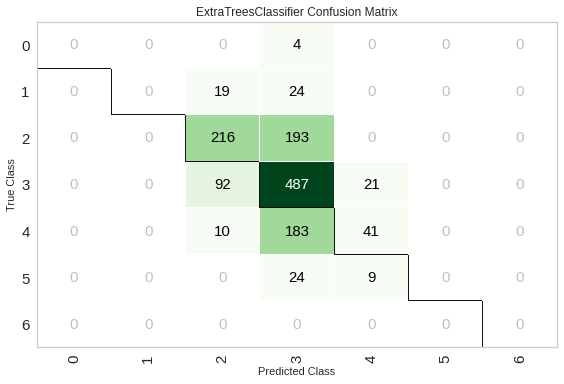

In [ ]:
plot_model(tuned_et, plot = 'confusion_matrix')

Something else to note, is that there are no predictions of quality=6.  
This is likely because the train-test split that pycaret did in setup(), split the dataset in such a way that no samples with quality=6 were include in the test data.  
We can verify this by looking at the labels, or 'y_test' that was created in setup(). We can get this via get_config()

In [ ]:
# verifying the lack of high quality values in the train-set
test_labels = get_config(variable="y_test")
test_labels.head()

33      2
2686    3
3805    4
2101    4
2034    3
Name: quality, dtype: int64

Further still, we can see (looking at the bottom row of confusion matrix) there is also no ground-truth labels where quality=6.  
I suspect this is because we took all of the samples where quality=6 out of the dataset when we grabbed our 'data_unseen' portion of the dataset.  
We can verify this by looking at the training set created in setup, and checking that there are no labels where quality=6.

In [ ]:
# verifying the lack of high quality values in the test-set
train_labels = get_config(variable="y_train")
train_labels.head()

4229    1
2629    2
2556    4
1721    3
957     2
Name: quality, dtype: int64

## Predicting with the model

In [ ]:
predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5624,0,0.2525,0.5417,0.5181,0.2683,0.2919


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,6.4,0.34,0.10,1.10,0.048,19.0,84.0,0.99270,3.21,0.38,9.8,5,5,0.4963
1,3.8,0.31,0.02,11.10,0.036,20.0,114.0,0.99248,3.75,0.44,12.4,6,6,0.4449
2,6.4,0.31,0.28,1.50,0.037,12.0,119.0,0.99190,3.32,0.51,10.4,7,6,0.4599
3,6.4,0.31,0.38,2.90,0.038,19.0,102.0,0.99120,3.17,0.35,11.0,7,6,0.4950
4,7.8,0.16,0.41,1.70,0.026,29.0,140.0,0.99100,3.02,0.78,12.5,6,6,0.4591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,8.2,0.27,0.39,7.80,0.039,49.0,208.0,0.99760,3.31,0.51,9.5,6,5,0.4608
1319,7.4,0.25,0.36,2.05,0.050,31.0,100.0,0.99200,3.19,0.44,10.8,6,6,0.5076
1320,6.7,0.26,0.29,7.70,0.038,40.0,179.0,0.99479,3.23,0.56,10.4,6,6,0.5075
1321,6.7,0.35,0.32,9.00,0.032,29.0,113.0,0.99188,3.13,0.65,12.9,7,7,0.4384


## Finalizing the model

In [ ]:
final_et = finalize_model(tuned_et)

## Predicting with unseen data

In [ ]:
unseen_predictions = predict_model(final_et, data=data_unseen)
correctly_predicted = []
for i in range(len(unseen_predictions)):
  if unseen_predictions["quality"][i] == unseen_predictions["Label"][i]:
    correctly_predicted.append(unseen_predictions["Label"])

print("Accuracy: ", len(correctly_predicted) / len(unseen_predictions["Label"]))
#unseen_predictions.head()
#unseen_predictions["quality"]
evaluate_model(final_et)

Accuracy:  0.5571428571428572


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Saving the model

In [ ]:
save_model(final_et,'Final ET Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight={}, criterion='entropy',
                                       max_depth=5, max_features=1.0,
                                       max_leaf_nodes=No

## Loading the model from saved file

In [ ]:
# loading the saved model
saved_final_knn = load_model('Final KNN Model')